In [1]:
#Importing standard packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy import interpolate
import sympy as sm
from sympy.plotting import plot
from sympy import lambdify
from scipy import linalg
from scipy import optimize
from scipy.optimize import brute
from scipy import interpolate
import time
import datetime
from IPython import display

#Importing custom functions
from examproject import *
from examproject.functions import *

#set format for output
sm.init_printing(use_unicode=True)

# Hvad gør disse?
%load_ext autoreload
%autoreload 2

np.seterr(all='print')
init_time=time.time()

<b>Note</b> that parts of the scripts takes a while to compute, so one should run all cells and start from the top.

# 1. Human capital accumulation 

We are given the below model described in the exam problem.
____________________________________________________________________________________________




Consider a worker living in **two periods**, $t \in \{1,2\}$. 

In each period she decides whether to **work ($l_t = 1$) or not ($l_t = 0$)**. 

She can *not* borrow or save and thus **consumes all of her income** in each period. 

If she **works** her **consumption** becomes:

$$c_t = w h_t l_t\,\,\text{if}\,\,l_t=1$$

where $w$ is **the wage rate** and $h_t$ is her **human capital**. 

If she does **not work** her consumption becomes:

$$c_t = b\,\,\text{if}\,\,l_t=0$$

where $b$ is the **unemployment benefits**.

Her **utility of consumption** is: 

$$ \frac{c_t^{1-\rho}}{1-\rho} $$

Her **disutility of working** is:

$$ \gamma l_t $$

From period 1 to period 2, she **accumulates human capital** according to:

$$ h_2 = h_1 + l_1 + 
\begin{cases}
0 & \text{with prob. }0.5 \\
\Delta & \text{with prob. }0.5 
\end{cases} \\
$$

where $\Delta$ is a **stochastic experience gain**.

In the **second period** the worker thus solves:

$$
\begin{eqnarray*}
v_{2}(h_{2}) & = &\max_{l_{2}} \frac{c_2^{1-\rho}}{1-\rho} - \gamma l_2
\\ & \text{s.t.} & \\
c_{2}& = & w h_2 l_2 \\
l_{2}& \in &\{0,1\}
\end{eqnarray*}
$$

In the **first period** the worker thus solves:

$$
\begin{eqnarray*}
v_{1}(h_{1}) &=& \max_{l_{1}} \frac{c_1^{1-\rho}}{1-\rho} - \gamma l_1 + \beta\mathbb{E}_{1}\left[v_2(h_2)\right]
\\ & \text{s.t.} & \\
c_1 &=& w h_1 l_1 \\
h_2 &=& h_1 + l_1 + \begin{cases}
0 & \text{with prob. }0.5\\
\Delta & \text{with prob. }0.5 
\end{cases}\\
l_{1} &\in& \{0,1\}\\
\end{eqnarray*}
$$

where $\beta$ is the **discount factor** and $\mathbb{E}_{1}\left[v_2(h_2)\right]$ is the **expected value of living in period two**.

The **parameters** of the model are:

In [2]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = 0.1

The **relevant levels of human capital** are:

In [3]:
h_vec = np.linspace(0.1,1.5,100) 

_________________________________________________________________________________

## Solving the problem in period 2

In the module `functions.py` we have defines functions that:
* Compute consumption
* Computes combined utility of consumption and disutility of labour
* Computes utility in period 2
* Computes utility in period 1
* Solves for period 2
* Solves for period 1 

In the module `visuals.py` there is a functon for plotting utility, labour and consumption as a function of human capital.
Using those, we now solve for period 2 and plot.

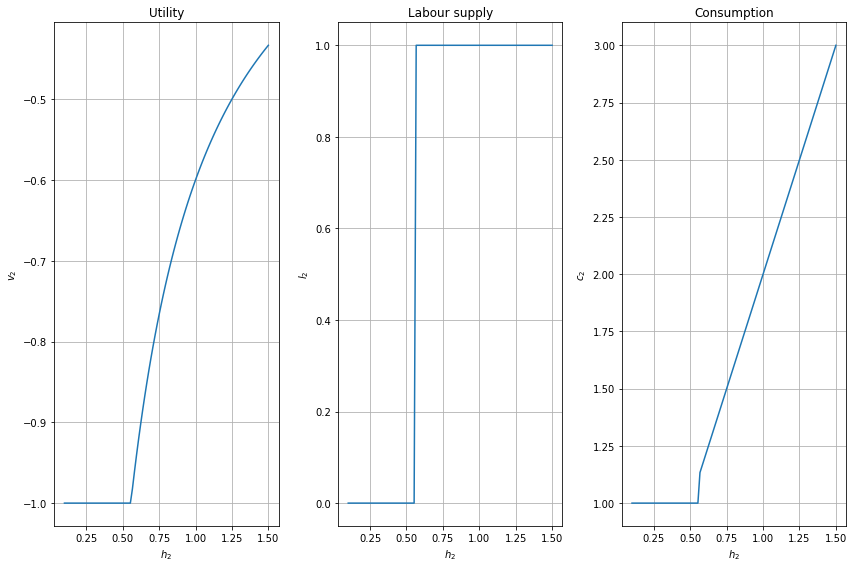

In [4]:
# Computing vectors of human cpaital, utility, labour and consumption in period 2
# that serves for equlibrium
h2_vec,v2_vec,l2_vec,c2_vec=solve_period_2(w,rho,b,gamma,h_vec)
# Plotting
maximfigure(h2_vec,l2_vec,c2_vec,v2_vec,2)

The above tells us, that if the human capital in period 2 is above 0.65, the worker is willing to supply labour as the wage recieved is higher than the unemployment benefit.

## Solving for period 1

Using the defined functions, we now solve in period 1.

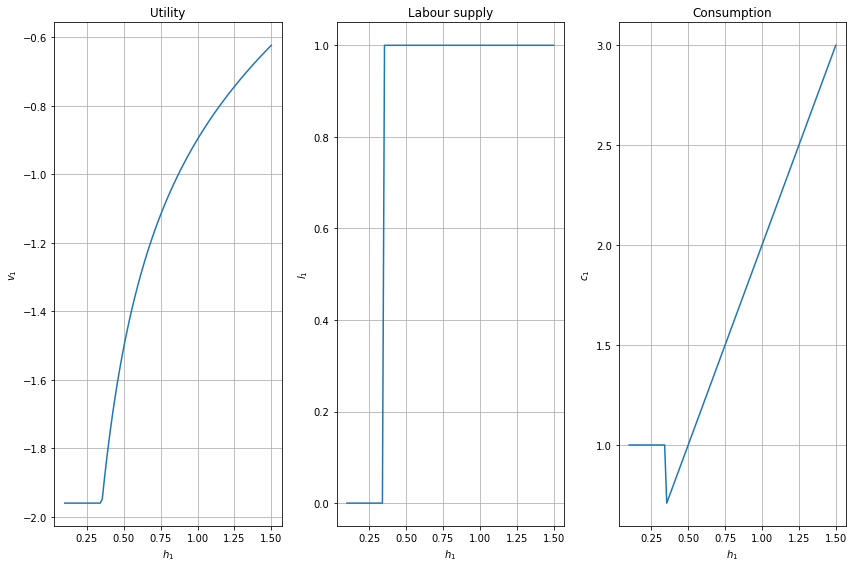

In [5]:
# Computing vectors of human cpaital, utility, labour and consumption in period 1
# that serves for equlibrium
h1_vec,v1_vec,l1_vec,c1_vec=solve(w,rho,b,gamma,beta,Delta,h_vec)
# Plotting
maximfigure(h1_vec,l1_vec,c1_vec,v1_vec,1)

The above shows, that even for $h_1 \approx 0.4$, the worker choose to supply labour,
where the that threshold was $\approx 0.55$ in period 2.
But as the worker choose to supply labour in period 1, her human capital immediately rises with $l_1=1$ and $E[\Delta]=0.05$.

## Will the worker never work if her potential wage income is lower than the unemployment benefits she can get?

First, we'll show that even for a wage lower than the unemployment benefit, the worker will choose to supply labour. We'll set the wage to marginally lower than $b$

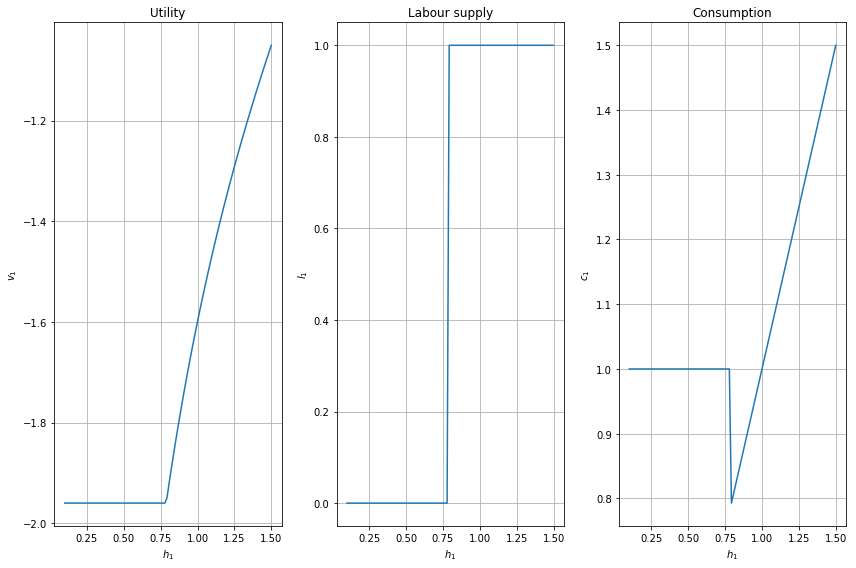

In [6]:
# Computing vectors of human cpaital, utility, labour and consumption in period 2
# that serves for equlibrium, where wage is below benefits.
h1_vec,v1_vec,l1_vec,c1_vec=solve(b-0.0001,rho,b,gamma,beta,Delta,h_vec)
maximfigure(h1_vec,l1_vec,c1_vec,v1_vec,1)

If $h_1$ is high enough (around 0.8), the worker will choose to work. The reason for this, is the accumulation of human capital. Even though the worker recieves less than benefits in period 1, which reduces her potential consumption in period 1, the gain in experience leads to a higher effective wage in period 2, and as the worker is forward-looking, although while discounting future utility, this leads to willingly reducing consumption in period 1.
To show this, will solve the same problem as above, but without accumulation of capital.

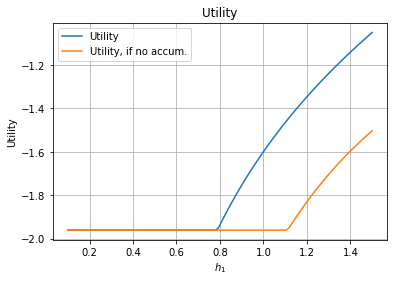

In [7]:
# Computing vectors of human cpaital, utility, labour and consumption in period 2
# that serves for equlibrium, where wage is below benefits and there is no accumulation
# of human capital.
h1_vec_no,v1_vec_no,l1_vec_no,c1_vec_no=solve(b-0.0001,rho,b,gamma,beta,Delta,h_vec,accum=False)
plt.plot(h1_vec,v1_vec,label='Utility')
plt.plot(h1_vec,v1_vec_no,label='Utility, if no accum.')
plt.grid()
plt.xlabel('$h_1$')
plt.ylabel('Utility')
plt.title('Utility')
plt.legend();

Above, we have plotted $v_1$ with and without accumulation of human capital.
Even if there is no accumulation, at some point, it will be more beneficial to supply labour.
But with accumulation, the total expected utility of both periods, $v_1$, is larger than without accumulation when $h_1 \gtrapprox 0.8 $, which is the same level of human capital, where the worker chose to supply labour despite of the income in period 1 being lower than benefits.

# AS-AD model

We are given the model described below

__________________________________________________________________

Consider the following **AS-AD model**. The **goods market equilibrium** is given by

$$ y_{t} = -\alpha r_{t} + v_{t} $$

where $y_{t}$ is the **output gap**, $r_{t}$ is the **ex ante real interest** and $v_{t}$ is a **demand disturbance**. 

The central bank's **Taylor rule** is

$$ i_{t} = \pi_{t+1}^{e} + h \pi_{t} + b y_{t}$$

where $i_{t}$ is the **nominal interest rate**, $\pi_{t}$ is the **inflation gap**, and $\pi_{t+1}^{e}$ is the **expected inflation gap**. 

The **ex ante real interest rate** is given by 

$$ r_{t} = i_{t} - \pi_{t+1}^{e} $$

Together, the above implies that the **AD-curve** is

$$ \pi_{t} = \frac{1}{h\alpha}\left[v_{t} - (1+b\alpha)y_{t}\right]$$

Further, assume that the **short-run supply curve (SRAS)** is given by

$$ \pi_{t} = \pi_{t}^{e} + \gamma y_{t} + s_{t}$$

where $s_t$ is a **supply disturbance**.

**Inflation expectations are adaptive** and given by

$$ \pi_{t}^{e} = \phi\pi_{t-1}^{e} + (1-\phi)\pi_{t-1}$$

Together, this implies that the **SRAS-curve** can also be written as

$$ \pi_{t} = \pi_{t-1} + \gamma y_{t} - \phi\gamma y_{t-1} + s_{t} - \phi s_{t-1} $$

The **parameters** of the model are:

In [8]:
par = {}
par['alpha'] = 5.76
par['h'] = 0.5
par['b'] = 0.5
par['phi'] = 0
par['gamma'] = 0.075

__________________________________________________________________

## Equilibrium values of $y_t$ and $\pi_t$

Defining variables.

In [9]:
global i,pi,pi_l,epi,epi_l,epi_pl,r,y,y_l,v,v_l,s,s_l,alpha,h,b,phi,gamma

i = sm.symbols('i_t')            # Nominal interest rate
pi =sm.symbols('\pi_t')          # Inflation gap
pi_l =sm.symbols('pi_{t-1}')    # Inflation gap, lagged
epi =sm.symbols('pi_t')         # Expected inflation gap
epi_l =sm.symbols('pi_{t-1}')   # Expected inflation gap, lagged 
epi_pl =sm.symbols('pi_{t-1}')  # Expected inflation gap, future
r = sm.symbols('r_t')            # Real interest rate
y =sm.symbols('y_t')             # Output gap
y_l =sm.symbols('y_{t-1}')       # Output gap, lagged
v = sm.symbols('v_t')            # Demand disturbance
v_l = sm.symbols('v_{t-1}')      # Demand disturbance, lagged
s = sm.symbols('s_t')            # Supply disturbance
s_l = sm.symbols('s_{t-1}')      # Supply disturbance, lagged
alpha = sm.symbols('alpha')      
h = sm.symbols('h')      
b = sm.symbols('b')      
phi = sm.symbols('phi')      
gamma = sm.symbols('gamma')      

Defining the AD equation using `sympy`.

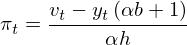

In [10]:
AD=sm.Eq(pi,1/(h*alpha)*(v-(1+b*alpha)*y))
AD

Defining the SRAS equation

In [11]:
SRAS=sm.Eq(pi,pi_l+gamma*y-phi*gamma*y_l+s-phi*s_l)
SRAS

Solving with respect to output gap and inflation gap.

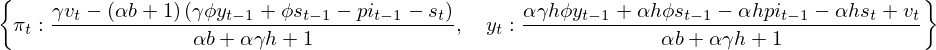

In [12]:
y_pi = sm.solve([AD,SRAS],[y,pi])
y_pi

## Illustrating equilibrium and a demand shock to it.

First we'll substitute in the values of the lagged output and inflation gap and the shocks.

Solving for equilibrium

In [13]:
# Defining initial values.
par['v_t']=0
par['pi_{t-1}']=0
par['y_{t-1}']=0
par['v_t']=0
par['s_t']=0
par['s_{t-1}']=0

# Substituting in the equations and solving.
AD_eq=AD.subs(par)       #Implementing values set in parameter-dictionary in AD
SRAS_eq=SRAS.subs(par)   #Implementing values set in parameter-dictionary in SRAS
AD_eq, SRAS_eq

In [14]:
eq_y_pi_eq = sm.solve([AD_eq,SRAS_eq],[y,pi])    #Solving for the initial equilibrium
eq_y_pi_eq                                  

Solving for equilibrium after shock

In [15]:
# Adding to the existing parameters.
par['v_t']=0.1         
AD_sh=AD.subs(par)       #Implementing demand shock in AD
SRAS_sh=SRAS.subs(par)   #Implementing demand shock in SRAS
AD_sh, SRAS_sh

In [16]:
eq_y_pi_sh = sm.solve([AD_sh,SRAS_sh],[y,pi]) #Solving for the shock
eq_y_pi_sh

Plotting results

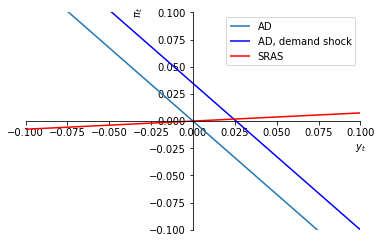

In [17]:
plot1=sm.plot(AD_eq.rhs, AD_sh.rhs, SRAS_eq.rhs,xlim=[-0.1,0.1], ylim=[-0.1,0.1],
                ylabel="$\pi_t$",xlabel="$y_t$",legend=True,aspect_ratio=(20,20),show=False)
plot1[1].line_color='b'
plot1[2].line_color='r'
plot1[0].label='AD'
plot1[1].label='AD, demand shock'
plot1[2].label='SRAS'
plot1.show()

The positive demand shock increases the demand for money and thus raises prices and thus inflation, that is, demand-pull inflation.

## Plotting impulse response functions

We start be initializing the equilibrium. Then we implement a persistent shock, and hereafter we find each equlibirum and fetch $y_t$ and $\pi_t$ and set the lagged variables for the next period.
The function `single_shock()` can be found the modules.

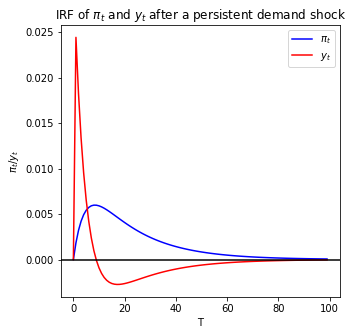

In [18]:
single_shock(100,v_shock=0.1)

The demand shock raises output and thus increase inflation. The central bank, cf. their Taylor-rule, responds to this by raising the nominal interest rate. This entails that the output falls below the initial value as the central bank sets the interest high in order to reduce inflation, thus boom-bust shock.

## Stochastic shocks

We'll now let the demand and supply shock be stochastic and normally distributed. The function below is defined in the modules, and the output is the evolutions of output and inflation.

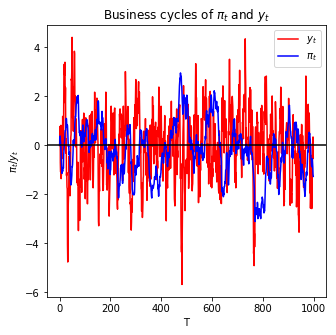

In [19]:
y_bc, pi_bc = stochproc(1000,v_on=True,s_on=True)

The above shows the business cycles of inflation and output.
We'll now calculate different statistics of the above variables.

In [20]:
statistics(y_bc,pi_bc)

1. Variance of output
1.9924598447871917
2. Variance of inflation
1.1842428723853964
3. Correlation between output and inflation
-0.1280566415980595
4. Auto-correlation of output
0.7820846187538315
5. Auto-correlation of inflation
0.981286025199083


## 2.5. Finding the value of $\phi$ that entails a correlation of 0.31 of output and inflation

We start by plotting the correlation as a function of $\phi$ utilizing the `stochproc()` from `functions.py`, as we can alter the value of $\phi$ in the function and supress the plot. This will take a while, so be patient.

In [21]:
corrs_y_pi=[]                            #Creating empty list
phi_list=np.linspace(0,1,20).tolist()    #Creating a lineary spaced list of phis
for phi in np.linspace(0,1,20):
    y_bc, pi_bc = stochproc(1000,v_on=True,s_on=True,phis=phi,plot=False)  # Computing inflation and output process for each phi while supressing the plot output
    corr=np.corrcoef(y_bc, pi_bc)[1,0]                           # Computing the correlation coefficient.
    corrs_y_pi.append(corr)                                      # Appending to the list of corr.coeff.
   

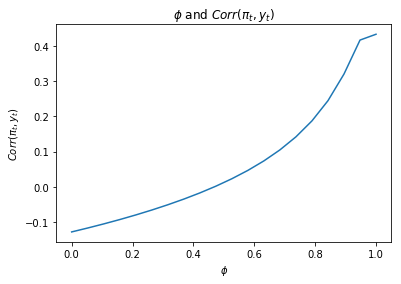

In [22]:
#Plotting phi with corr.coeff.
plt.plot(phi_list,corrs_y_pi)  
plt.xlabel('$\phi$')
plt.ylabel('$Corr(\pi_t , y_t)$')
plt.title('$\phi$ and $Corr(\pi_t , y_t)$');

We'll define a function that returns the absolute value of difference of 0.31 and correlation as a function of $\phi$, and use that to optimize the value of $\phi$ in order to obtain the correct correlation coefficient.

<b>Note</b> that as we can visually see in the above plot, we know that the optimal $\phi \in (0.8,1)$ approximately, so we'll spare the user for some time, by including the this interval as bounds in the optimization.

<font color='red'><b> Note </b>
For some reason, the cell below often fails and reports an issue of the type of variables in the function. The solution to this, is to reimport the custom functions from our modules. We've tried to find out what the issue is exactly, but without success. So the custom functions are reimported first.
</font>

In [23]:
from examproject import *
from examproject.functions import *

obj=lambda phis: corr(phis)                                                 #Setting the objective function from the modul 'functions
phi_res=optimize.minimize_scalar(obj,0.9,method='bounded',bounds=[0.8,1]) #Optimizing

In [24]:
print('Optimal phi:')
print(phi_res.x)
print('Correlation coefficent obtained, wait please:')
diff,corrcoef=corr(phi_res.x,corr_out=True)
print(corrcoef)

Optimal phi:
0.8886632821118373
Correlation coefficent obtained, wait please:
0.30999896257915516


So the value of $\phi$ such that the correlation between inflation and output is approx. 0.889 and the obtaind corr.coeff. is very close to 0.31.

##  Matching the US economy

We will now attempt to find the optimal combination of $\phi$, $\sigma ^x$ and $\sigma ^c$ that matches the statistics of inflation and output with the US economy.

<b>Note</b> that we are using functions from the module `functions.py`. First we use the function `us_econ(phi,sigmax,sigmac)`, that generates the statistics of inflation and output and compute the difference from the US economy of each statistic. The function then sums all of the differences. This is what we seek to minimize.
As we must use multiple argument to obtain the US-alike statistics, we use a list of of the variables as an argument to the function. So the objective function still only takes one argument, as needed in order to use it as an objective function with `scipy.optimize`.

But then we must also use a list of initial values and a list of bounds.

We have already tried altering the parameters one by one and at least we have found a local minimum. We use that as an initial guess.
Moreover, in order to spare time, we are using rather small ranges as bounds for the standard deviations.

<b>Note</b> that we timed the optimization process and it took approx. 15 minutes. Therefore, we have 'turned off' the function by putting the code block in a `while False:` and saved the results in seperate cells, so the user do not have to wait for it to finish. If one where to try it out, they should just alter the code to `while True:`
Arguably, there could more efficient methods to this problem, but we've have chosen to go with this one.




In [25]:
while False:
    # Bounds for each item of the argument-list
    boundphi=(0,1)
    boundsigmax=(0,10)
    boundsigmac=(0,10)
    # Collecting bounds in one list.
    bounds=(boundphi,boundsigmax,boundsigmac)

    # Initial guess for each item of the argument-list
    init_stat=(0.9418,3.114,0.316)
    obj=lambda stat: us_econ(stat)                #Setting the objective function from the modul 'functions
    starttime=time.time()                        #Starting a 'stop watch'
    result = optimize.minimize(obj,init_stat,method='SLSQP',bounds=bounds,options={'disp':True}) # Optimizing
    endtime=time.time()                         #Stopping a 'stop watch'
    print('Time elapsed: '+str(endtid-starttime))  #Printing time elapsed
    print(result)                               #Printing results from optimization
    print(result.x)

Above is the results from optimization.
The optimizing parameters are $\phi=0.952$, $\sigma_x=3.097$ and $\sigma_c=0.244$.
Below we save the optimizing array of parameters and put them in the simulation function while surpressing the plot and calculating the statistics.

In [26]:
saved_result=np.array([0.95217138, 3.0970445 , 0.24371336])

In [27]:
y_bc, pi_bc = stochproc(1000,v_on=True,s_on=True,plot=False,phis=saved_result[0],sigmax=saved_result[1],sigmac=saved_result[2])
statistics(y_bc,pi_bc)

1. Variance of output
1.6378866967276513
2. Variance of inflation
0.08166912291038368
3. Correlation between output and inflation
0.3092132875784681
4. Auto-correlation of output
0.7855115090476144
5. Auto-correlation of inflation
0.47999999105308583


$var(y_t)$, $corr(y_t\pi_t)$ and $corr(\pi_t\pi_{t-1})$ matches the US economy very well. The other statistics do not. However, the summed difference from the US economy is only 0.18 as visible from the output of the optimization.

# Exchange economy

We are given the model described below

___________________________________________________________

Consider an **exchange economy** with

1. 3 goods, $(x_1,x_2,x_3)$
2. $N$ consumers indexed by \\( j \in \{1,2,\dots,N\} \\)
3. Preferences are Cobb-Douglas with log-normally distributed coefficients

    $$ \begin{eqnarray*}
    u^{j}(x_{1},x_{2},x_{3}) &=& 
    \left(x_{1}^{\beta_{1}^{j}}x_{2}^{\beta_{2}^{j}}x_{3}^{\beta_{3}^{j}}\right)^{\gamma}\\
     &  & \,\,\,\beta_{i}^{j}=\frac{\alpha_{i}^{j}}{\alpha_{1}^{j}+\alpha_{2}^{j}+\alpha_{3}^{j}} \\
     &  & \,\,\,\boldsymbol{\alpha}^{j}=(\alpha_{1}^{j},\alpha_{2}^{j},\alpha_{3}^{j}) \\ 
     &  & \,\,\,\log(\boldsymbol{\alpha}^j) \sim \mathcal{N}(\mu,\Sigma) \\
    \end{eqnarray*} $$

4. Endowments are exponentially distributed,

$$
\begin{eqnarray*}
\boldsymbol{e}^{j} &=& (e_{1}^{j},e_{2}^{j},e_{3}^{j}) \\
 &  & e_i^j \sim f, f(z;\zeta) =  1/\zeta \exp(-z/\zeta)
\end{eqnarray*}
$$

Let $p_3 = 1$ be the **numeraire**. The implied **demand functions** are:

$$
\begin{eqnarray*}
x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j})&=&\beta^{j}_i\frac{I^j}{p_{i}} \\
\end{eqnarray*}
$$

where consumer $j$'s income is

$$I^j = p_1 e_1^j + p_2 e_2^j +p_3 e_3^j$$

The **parameters** and **random preferences and endowments** are given by:

In [28]:
# a. parameters
N = 50000
mu = np.array([3,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 0.8
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

___________________________________________________________

## Illustrating consumers' budget shares of each good

As the utility function is a Cobb-Douglas, and therefore $\gamma$ represents a monotonic transformation of the preferences, $\beta$ represents the budget shares. Below we will then plot each $\beta^j_1$, $\beta^j_2$ and $\beta^j_3$.

In [29]:
# Initializing lists of betas for each good
beta1=[]
beta2=[]
beta3=[]
for x in [1,2,3]: #Looping over goods
    for j in range(N): #Looping over consumers
        #betax is appended by j consumers x good beta coefficient.
        globals()['beta%s' % x].append(betas[j][x-1]) 

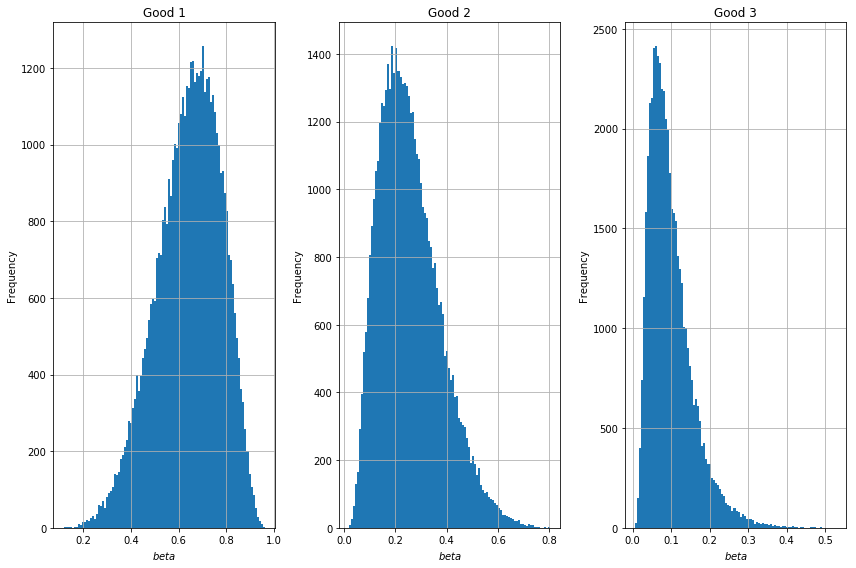

In [30]:
# Plotting
fig=plt.figure(figsize=(12,8))
for axs in [1,2,3]:
    ax = fig.add_subplot(1,3,axs)
    ax.hist(globals()['beta%s' % axs],bins=100);
    ax.grid()
    ax.set_xlabel('$beta$')
    ax.set_ylabel('Frequency')
    ax.set_title('Good '+str(axs))
fig.tight_layout()

## Plotting the excess demands functions

We start by defining the demand functions for each good as functions. These are already given in the assignment. The excess demand is equal to the sum of demand for each good minus the sum of the initial endowment of each good.
Having defined the demand functions, we can now define the excess demand functions.  This is all done in the module `functions.py`.These functions enables us to plot the excess demand for each good as a function of the $p_1$ and $p_2$ combination.

In [31]:
# We start by creating a mesh of the combination of prices.
p1_vec = np.linspace(0.1,10,200)
p2_vec = np.linspace(0.1,10,200)
p1_grid,p2_grid = np.meshgrid(p1_vec,p2_vec,indexing='ij')
# Initializing the grid of excess demand as a function of prices
ex1_grid = np.empty((200,200))
ex2_grid = np.empty((200,200))
ex3_grid = np.empty((200,200))

# Computing excess demand for each good as a function of prices
for i,p1 in enumerate(p1_vec):
    for j,p2 in enumerate(p2_vec):
        ex1_grid[i,j] = ex_demand_good1(betas,p1,p2,e1,e2,e3)
        ex2_grid[i,j] = ex_demand_good2(betas,p1,p2,e1,e2,e3)
        ex3_grid[i,j] = ex_demand_good3(betas,p1,p2,e1,e2,e3)

We've now generated the grids for the plots, so wewe will now plot.

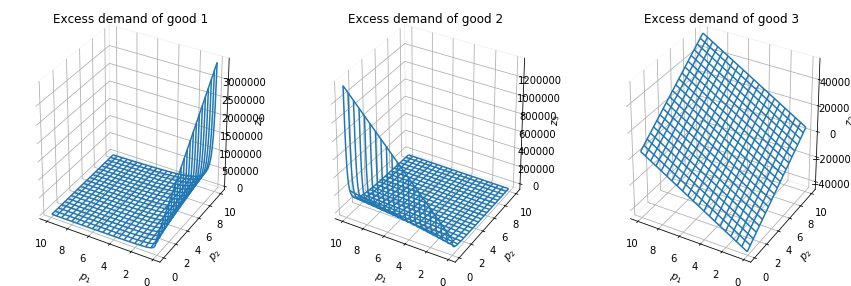

In [32]:
# Plotting
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,3,1,projection='3d')
ax.plot_wireframe(p1_grid,p2_grid,ex1_grid, rstride = 10, cstride = 10)
ax.invert_xaxis()
ax.set_title('Excess demand of good 1')
ax.set_xlabel('$p_1$')
ax.set_ylabel('$p_2$')
ax.set_zlabel('$z_1$')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax1 = fig.add_subplot(1,3,2,projection='3d')
ax1.plot_wireframe(p1_grid,p2_grid,ex2_grid, rstride = 10, cstride = 10)
ax1.invert_xaxis()
ax1.set_title('Excess demand of good 2')
ax1.set_xlabel('$p_1$')
ax1.set_ylabel('$p_2$')
ax1.set_zlabel('$z_3$')
ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False

ax2 = fig.add_subplot(1,3,3,projection='3d')
ax2.plot_wireframe(p1_grid,p2_grid,ex3_grid, rstride = 10, cstride = 10)
ax2.invert_xaxis()
ax2.set_title('Excess demand of good 3')
ax2.set_xlabel('$p_1$')
ax2.set_ylabel('$p_2$')
ax2.set_zlabel('$z_2$')
ax2.xaxis.pane.fill = False
ax2.yaxis.pane.fill = False
ax2.zaxis.pane.fill = False

We see that as $p_1$ goes towards zero and especially when good 1 is relatively cheap over good 2, the excess demand for good 1 rises.
The same goes for good 2, when $p_2$ falls.
When the prices for both good 1 and good 2 rises, good 3 becomes relatively cheap and its demand rises.

## Finding the Walras-equilibrium

We will define a function, wher the user can give an intial guess of prices that entail equilibirum in the markets of good 1 and good 2.
We will use a tâtonnement process, which is done by `walras_taton()` from the module `functions.py`

In [33]:
# Computing prices in the Walrasian equilibirum
p1_eq,p2_eq = walras_taton(5,5,betas,e1,e2,e3,N,epsilon=0.0001,kappa=0.2,max_iters=10000)

Completed. 
The Walras-equilibrium prices are: 
 p1: 6.490055255000671
 p2: 2.616694041336358

Excess demand in market 1: -9.997473534895107e-05

Excess demand in market 2: -3.72963331756182e-05

Excess demand in market 3: 0.0007464346781489439


Acoording to Walras' Law, the sum of excess demand in all n markets is equal to zero. Therefore, if n-1 markets is in equlibrium and there exists no excess demand, the last market will also clear. Therefore, if will suffice to check for no excess demand in the first to markets, which is wwhat we have done above. We can perform a check by computing the excess demand in all markets, using the above prices.

The excess demand is very close to zero.

## Plotting the distribution of utility

We start by defining a function that calculates the utility based on the given utility function, `utility()` and then use `utility_plot_stat()`, which itself uses `utility()`, both defined in the module `functions.pu` to compute the vector of utlity and then plot it in a histogram.

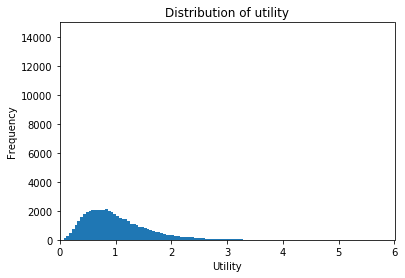


Mean of utility: 1.010164459775825

Variance of utility: 0.3173402059010014


In [34]:
# Computing utility in the Walrasian equilibrium and plotting.
utility_plot_stat(betas,p1_eq,p2_eq,e1,e2,e3,gamma)

## The Walras equilibrium for equal endowments

We start by creating new vectors of endowments, where the given endowments are distributed equally.

In [35]:
# Creating new endowments, where each consumers endowment of each good
    #is equal to the mean of the initial endowment of that good.
e1_eqe = np.zeros(N)+np.mean(e1)
e2_eqe = np.zeros(N)+np.mean(e2)
e3_eqe = np.zeros(N)+np.mean(e3)

We will now find the prices that entail a Walras equilibrium using `walras_taton()` from `functions.py`

In [36]:
# Computing the prices in the Walrasian equlibrium given equal endowments.
p1_eq_eqe,p2_eq_eqe = walras_taton(5,5,betas,e1_eqe,e2_eqe,e3_eqe,N,epsilon=0.0001,kappa=0.2,max_iters=10000)

Completed. 
The Walras-equilibrium prices are: 
 p1: 6.485991169468596
 p2: 2.6172457122234225

Excess demand in market 1: -9.99098047032021e-05

Excess demand in market 2: -3.732368350028992e-05

Excess demand in market 3: 0.0007456994062522426


We will now calculate the utility and plot the distribution and print the statistics using `utility_plot_stat()` from `functions.py`.

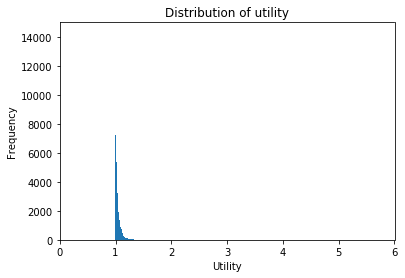


Mean of utility: 1.0463375710843865

Variance of utility: 0.0030169807725761583


In [37]:
# Computing utility in the Walrasian equilibrium and plotting.
utility_plot_stat(betas,p1_eq_eqe,p2_eq_eqe,e1_eqe,e2_eqe,e3_eqe,gamma)

Now that the endowments are equal across consumers the utility will be more evenly distributed as the variance of their preferences for each good is small. Such that the exchange within the economy is small. A more equal initital endowment then decreases the variance of the utility.

If we were to raise $\gamma$ the variance will be higher, as the effect on utility from exchange will be as diversified across consumers as for a low $\gamma$ but the small differences in utility caused by preferences will be magnified.

Below we generate a animated histogram (with percent and not frequency) across different values of $\gamma$. Run the cell below in order to rerun it.

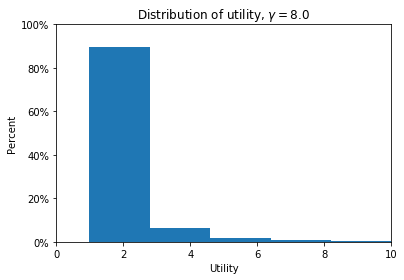


Mean of utility: 1.9120968595049008

Variance of utility: 9.749772444313058


None

In [38]:
# Creating a list of gammas
gammas_list=[0.5]
i=0
while i<=14:
    gammas_list.append(gammas_list[-1]+0.5)
    i+=1


# Plotting the utility distribution through the list of gammas    
for gammas in gammas_list:
    time.sleep(0.5)
    display.display(utility_plot_stat(betas,p1_eq_eqe,p2_eq_eqe,e1_eqe,e2_eqe,e3_eqe,gammas,perc=True));
    display.clear_output(wait=True);

Raising $\gamma$ had the effect as expected. When $\gamma$ is raised the difference in preferences entails a higher difference in utility. But the utility has very low variance from the start stemming from the equal initial endowment, so the difference in utility is solely caused by preferences, and these difference is higher for a higher $\gamma$.

Below we plot the effect on variance and mean of utility from $\gamma$ for both initial and equal endowments.

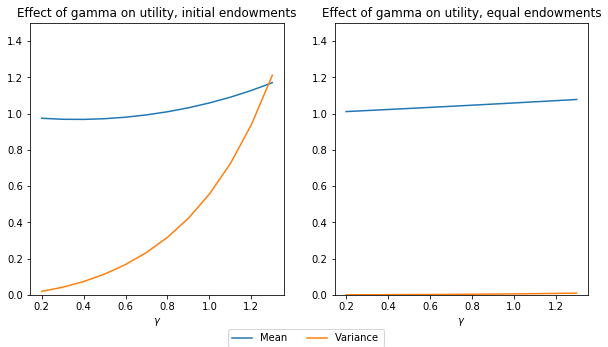

In [39]:
# Creating a new list of gammas
gammas_list=[0.2]
i=0
while i<=10:
    gammas_list.append(gammas_list[-1]+0.1)
    i+=1

# Initializing lists of mean and variance of both distriutions of utility.
mean_init=[]
mean_equal=[]
var_init=[]
var_equal=[]
# Computing the statistics  through gammas using the utility-computing function in the module
for gammas in gammas_list:
    mean_init.append(np.mean(utilityexch(betas,p1_eq,p2_eq,e1,e2,e3,gammas)))
    mean_equal.append(np.mean(utilityexch(betas,p1_eq_eqe,p2_eq_eqe,e1_eqe,e2_eqe,e3_eqe,gammas)))
    var_init.append(np.var(utilityexch(betas,p1_eq,p2_eq,e1,e2,e3,gammas)))
    var_equal.append(np.var(utilityexch(betas,p1_eq_eqe,p2_eq_eqe,e1_eqe,e2_eqe,e3_eqe,gammas)))

# Plotting
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
l1=ax.plot(gammas_list,mean_init, label='Mean')[0]
l2=ax.plot(gammas_list,var_init, label='Variance')[0]
ax.set_title('Effect of gamma on utility, initial endowments')
ax.set_xlabel('$\gamma$')
ax.set_ylim((0,1.5))
ax1 = fig.add_subplot(1,2,2)
ax1.plot(gammas_list,mean_equal, label='Mean')
ax1.plot(gammas_list,var_equal, label='Variance')
ax1.set_title('Effect of gamma on utility, equal endowments')
ax1.set_xlabel('$\gamma$')
ax1.set_ylim((0,1.5))
fig.legend([l1,l2], ['Mean','Variance'], loc = (0.375, 0), ncol=2 )

Visible, having equal endowments means that there is less exchange and the difference in utility is small as its only caused by the small differences in preferences. So although a higher $\gamma$ magnifies the effect of theses differences, the change is minimal.


However, when using the initial endowments, the effect on the variance is much higher. Here the difference in utility post-exchange is both caused by difference in preferences but also the initial wealth of each consumer given their initial endowments. And these differences are magnified by a higher $\gamma$.

In [40]:
finish_time=time.time()
print('Time elapsed for this notebook to run: '+str(datetime.timedelta(seconds=round(finish_time-init_time))))

Time elapsed for this notebook to run: 0:13:21
